# **Mencari Kata Penting**

Proses ini menghasilkan kata-kata penting yang mencerminkan inti dari teks yang dianalisis. Kata-kata yang memiliki bobot tinggi dalam kalimat-kalimat yang serupa dianggap sebagai kata kunci atau kata penting

## Import Library

In [ ]:
!pip install PySastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 3.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
import networkx as nx
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords as nltk_stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Fungsi Untuk Proses Membuat Kata Penting

In [ ]:
# Inisialisasi stemmer dan stopwords bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stopwords_list = set(nltk_stopwords.words('indonesian'))

In [ ]:
# Fungsi untuk preprocessing
def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Menghapus URL
    text = re.sub(r'\d+', '', text)  # Menghapus angka
    text = re.sub(r'[^\w\s]', '', text)  # Menghapus tanda baca
    text = text.lower()  # Mengubah ke huruf kecil
    tokens = word_tokenize(text)  # Tokenisasi
    tokens = [word for word in tokens if word not in stopwords_list]  # Menghapus stopwords
    tokens = [stemmer.stem(word) for word in tokens]  # Stemming
    return ' '.join(tokens)  # Menggabungkan kembali token menjadi teks
# Fungsi untuk menghitung TF-IDF
def compute_tfidf(kalimat_preprocessed):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(kalimat_preprocessed).toarray()
    tfidf_df = pd.DataFrame(tfidf_matrix, columns=vectorizer.get_feature_names_out())
    return tfidf_df, vectorizer

# Fungsi untuk menghitung cosine similarity
def compute_cosine_similarity(tfidf_matrix):
    cosine_sim = cosine_similarity(tfidf_matrix)
    return cosine_sim

# Fungsi untuk membuat adjacency matrix
def create_adjacency_matrix(cosine_sim):
    threshold = 0.1  # ambang batas untuk adjacency matrix
    adjacency_matrix = (cosine_sim > threshold).astype(int)
    return adjacency_matrix

# Fungsi untuk menggambar graph
def draw_graph(adjacency_matrix, feature_names):
    G = nx.from_numpy_array(adjacency_matrix)  # Buat graph dari adjacency matrix
    labels = {i: feature_names[i] for i in range(len(feature_names)) if i < adjacency_matrix.shape[0]} #ambil features

    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G)  # posisi layout untuk graph
    nx.draw(G, pos, with_labels=True, labels=labels, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
    plt.title('Kata yang Terhubung')
    plt.show()

# Fungsi untuk mendapatkan kata penting
def extract_important_words(tfidf_df):
    kata_penting = tfidf_df.max(axis=0)  # Mengambil nilai maksimum dari setiap kolom
    kata_penting_df = pd.DataFrame(kata_penting, columns=['Nilai TF-IDF']).reset_index()
    kata_penting_df.columns = ['Kata', 'Nilai TF-IDF']
    kata_penting_df = kata_penting_df.sort_values(by='Nilai TF-IDF', ascending=False)
    return kata_penting_df


## Input Berita

In [ ]:
from nltk.tokenize import sent_tokenize
# Step 1: Input Berita
berita = input("Masukkan berita: ")

# Step 2: Pecah berita menjadi kalimat
kalimat_list = sent_tokenize(berita)
kalimat_df = pd.DataFrame(kalimat_list, columns=['Kalimat'])
print("\n=== Hasil Ekstrak Kalimat ===")
print(kalimat_df)

Masukkan berita: Optimisme ini disampaikan Pj Gubernur Adhy saat Pembukaan Bank Jatim Trade Connect Summit 2024 dengan tema 'Your Opportunity to Connect' di Balai Pemuda, Jalan Gubernur Suryo, Surabaya, Senin (14/10/2024) sore. Pause   00:00 00:05 00:56 Mute  Dalam pembukaan tersebut, Pj Gubernur Adhy juga didampingi Direktur Keuangan, Treasury, dan Global Services Bank Jatim dan Sesditjen Pengembangan Ekspor Nasional Kemendag RI membuka acara yang di tandai dengan penekanan tombol sirine.  “Atas nama Pemprov Jatim, kami menyampaikan apresiasi kepada Bank Jatim sebagai motor yang menggerakkan UMKM sehingga bisa naik kelas,” ujar Adhy.   “Jadi namanya juga trade center, yang terkoneksi baik dengan dunia internasional. Membawa mitra buyer dari luar negeri dan langsung bertransaksi business matching dengan masing - masing produk,” tambahnya.  Adhy melanjutkan, peran perbankan apalagi bank daerah sangat penting untuk melatih pelaku UMKM. Terlebih, Jawa Timur mempunyai potensi UMKM dan Sumb

## Preprocessing

In [ ]:
# Step 3: Preprocessing
kalimat_preprocessed = [preprocess_text(kalimat) for kalimat in kalimat_list]
kalimat_preprossesed_df = pd.DataFrame(kalimat_preprocessed, columns=['Kalimat Clean'])
print("\n=== Hasil Preprocessing ===")
print(kalimat_preprossesed_df)


=== Hasil Preprocessing ===
                                        Kalimat Clean
0   optimisme pj gubernur adhy buka bank jatim tra...
1   pause mute buka pj gubernur adhy damping direk...
2   nama pemprov jatim apresiasi bank jatim motor ...
3       nama trade center koneksi dunia internasional
4   bawa mitra buyer negeri langsung transaksi bus...
5   adhy lanjut peran perban bank daerah latih lak...
6   jawa timur potensi umkm sumber daya alam sda t...
7   umkm tingkat kapasitas akses ajar transaksi in...
8                    rangkai ingat pemprov jatim adhy
9   bank jatim bumd kontribusi langsung rasa masya...
10  adhy optimis bank jatim bank bangun daerah bpd...
11            kontribusi umkm pdb jatim alami tingkat
12  tingkat persen banding target kontribusi capai...
13                        negara tuju utama ekspor pj
14  gubernur adhy arab tiongkok hong akong jepang ...
15                       kewalahan minta booth negeri
16  indonesia trade center jawa timur alhamdulilla...

## Transformasi TF-IDF

In [ ]:
# Step 4: Hitung TF-IDF
tfidf_df, vectorizer = compute_tfidf(kalimat_preprocessed)
print("\n=== Hasil TF-IDF ===")
print(tfidf_df)


=== Hasil TF-IDF ===
       acara      adhy      ajar     akong     akses     aktif      alam  \
0   0.000000  0.121933  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.184614  0.126202  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.212673  0.000000  0.000000  0.000000  0.000000  0.000000   
3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   0.000000  0.248925  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.365733   
7   0.000000  0.000000  0.478428  0.000000  0.393186  0.000000  0.000000   
8   0.000000  0.318226  0.000000  0.000000  0.000000  0.000000  0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.000000  0.173386  0.000000  0.000000  0.000000  0.308624  0.000000   
11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.

## Cosine Similarity

In [ ]:
# Step 5: Hitung Cosine Similarity
cosine_sim = compute_cosine_similarity(tfidf_df.values)
print("\n=== Hasil Cosine Similarity ===")
print(cosine_sim)


=== Hasil Cosine Similarity ===
[[1.         0.21837269 0.08746935 ... 0.         0.05730526 0.0430737 ]
 [0.21837269 1.         0.09053137 ... 0.         0.15907528 0.47746036]
 [0.08746935 0.09053137 1.         ... 0.         0.15778145 0.1057098 ]
 ...
 [0.         0.         0.         ... 1.         0.21069554 0.        ]
 [0.05730526 0.15907528 0.15778145 ... 0.21069554 1.         0.31675025]
 [0.0430737  0.47746036 0.1057098  ... 0.         0.31675025 1.        ]]


## Adjacency Matrix

In [ ]:
# Step 6: Buat Adjacency Matrix
adjacency_matrix = create_adjacency_matrix(cosine_sim)
adjacency_df = pd.DataFrame(adjacency_matrix, index=kalimat_df.index, columns=kalimat_df.index)
print("\n=== Hasil Adjacency Matrix ===")
print(adjacency_df)


=== Hasil Adjacency Matrix ===
    0   1   2   3   4   5   6   7   8   9   ...  25  26  27  28  29  30  31  \
0    1   1   0   0   0   0   0   0   0   0  ...   0   1   0   0   0   0   0   
1    1   1   0   0   0   0   0   0   0   0  ...   0   1   0   0   0   1   0   
2    0   0   1   1   0   1   0   0   1   1  ...   0   1   1   1   0   0   1   
3    0   0   1   1   0   0   0   1   0   0  ...   0   0   1   0   0   0   0   
4    0   0   0   0   1   0   0   1   0   1  ...   0   0   0   0   0   0   0   
5    0   0   1   0   0   1   0   0   0   1  ...   0   0   0   0   0   0   1   
6    0   0   0   0   0   0   1   0   0   0  ...   0   0   1   0   1   0   0   
7    0   0   0   1   1   0   0   1   0   0  ...   0   0   0   0   1   0   0   
8    0   0   1   0   0   0   0   0   1   0  ...   0   0   0   1   0   0   0   
9    0   0   1   0   1   1   0   0   0   1  ...   0   1   0   1   0   0   1   
10   0   0   1   0   0   1   1   0   0   1  ...   0   1   1   1   0   0   0   
11   0   0   1   0  

## Graph

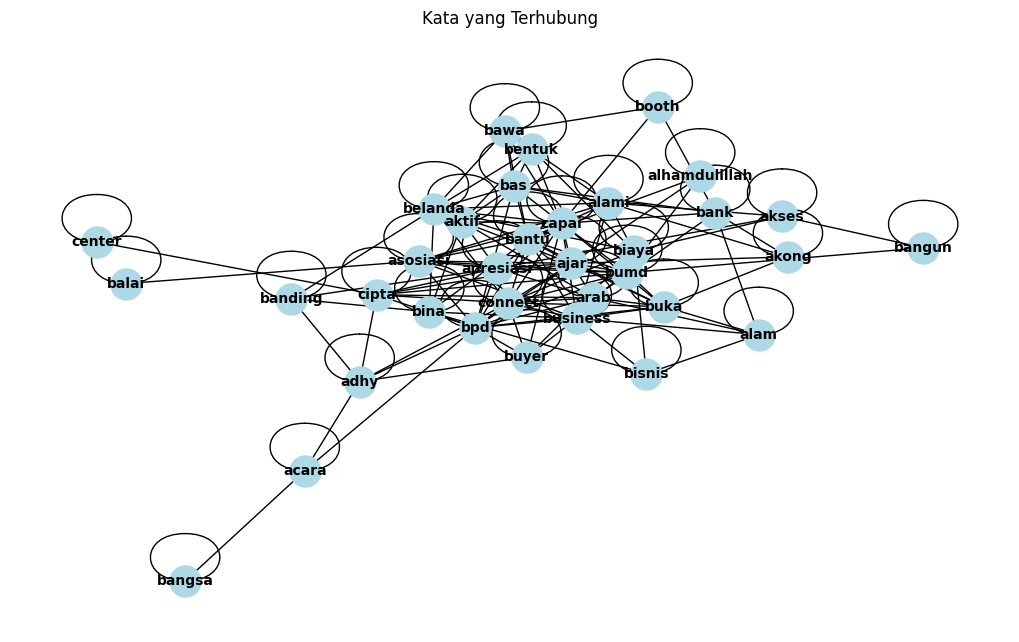

In [ ]:
# Step 7: Gambar Graph
draw_graph(adjacency_matrix, vectorizer.get_feature_names_out())

Jika suatu kata muncul dalam banyak kalimat yang terhubung (artinya ada banyak 1 di adjacency matrix untuk kata tersebut), maka kata itu akan memiliki lebih banyak koneksi di graf.

## Mengambil Kata Penting

In [ ]:
# Step 7: Kata Penting - Ambil 5 Kata Teratas berdasarkan TF-IDF
tfidf_sums = tfidf_df.sum(axis=0)  # Jumlahkan setiap kolom untuk mendapatkan total TF-IDF

# Membuat DataFrame dengan kata dan nilai TF-IDF
tfidf_ranking_df = pd.DataFrame({
    'Kata': vectorizer.get_feature_names_out(),
    'Nilai TF-IDF': tfidf_sums
})

# Merank berdasarkan nilai TF-IDF
tfidf_ranking_df = tfidf_ranking_df.sort_values(by='Nilai TF-IDF', ascending=False)

# Reset the index so that the 'Kata' column doesn't act as the index
tfidf_ranking_df.reset_index(drop=True, inplace=True)

# Tampilkan hanya 10 kata teratas
top_10_kata = tfidf_ranking_df['Kata'].head(10)

In [ ]:
tfidf_ranking_df

,Kata,Nilai TF-IDF
0,jatim,3.220788
1,ekspor,2.525993
2,umkm,2.355145
3,tingkat,2.197589
4,bank,2.164030
...,...,...
196,dinas,0.216360
197,hutan,0.216360
198,penandatanganan,0.186416
199,rangka,0.186416


## Top 10 Kata Penting

In [ ]:
print("\n=== 10 Kata Teratas ===")
top_10_kata


=== 10 Kata Teratas ===


,Kata
0,jatim
1,ekspor
2,umkm
3,tingkat
4,bank
5,usaha
6,adhy
7,laku
8,kembang
9,perban
